<a href="https://colab.research.google.com/github/Mike-Xie/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# Replicating Lesson Code: Getting & Loading Data and **Libraries**

In [0]:
##### Begin Working Here #####
#I like to load everything at the top, habit from old programming courses
#Retyped the stuff at start that makes sense to for this assignment like dtypes, etc, not everything
#And in an order that feels more natural to me.

import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 999




In [2]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-10-30 15:19:22--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [               <=>  ]  21.62M   317KB/s    in 72s     

2019-10-30 15:20:35 (307 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [3]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [4]:
!head LoanStats_2018Q4.csv #checks out

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

# Make data anon by dropping ID columns



In [5]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,

In [6]:
df_anon = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)
df_anon.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.0

In [7]:
df_anon.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [8]:
df_anon.isnull().sum().sort_values()

loan_amnt                                          0
mo_sin_rcnt_rev_tl_op                              0
mo_sin_old_rev_tl_op                               0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
total_cu_tl                                        0
inq_fi                                             0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
open_il_12m                                        0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                  

# Assignment Part 2 Convert Term String to Int

In [0]:
# Convert the term column from string to integer.
# df_anon['term'][3] is ' 36 months' so we need to take out whitespace and months
# prac = ' 36 months'
# a
# 36
# type(a)
# str
# type(int(a))
# int

def term_to_int(string):
  return int(string.strip("months").strip())

In [0]:
df_anon['term'] = df_anon['term'].apply(term_to_int)

In [11]:
df_anon.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,20000,20000,20000.0,36,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,26500,26500,26500.0,60,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10400,10400,10400.0,36,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,35000,35000,35000.0,60,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,




# Assignment Part 3 Loan Status Great Feature Creation





In [12]:
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.
# Let's see what types of status there are, don't expect too many
status_counts = df_anon['loan_status'].value_counts(dropna=False)
status_counts

Current               105925
Fully Paid             15780
Charged Off             2863
Late (31-120 days)      2482
In Grace Period          901
Late (16-30 days)        459
Default                    2
Name: loan_status, dtype: int64

In [0]:
# No leading or trailing whitespace
a = df_anon['loan_status'][3]
a 
'Current'
b = df_anon['loan_status'][1]
b 
'Fully Paid'

# wanted to find alternative to contains('Current'|'Fully Paid') 
# did so using isin function
# use astype to convert Boolean to 1s and 0s
good_status_values = ['Current', 'Fully Paid']

df_anon['loan_status_is_great'] = df_anon['loan_status'].isin(good_status_values).astype(int)





In [14]:
df_anon['loan_status']
great_status_counts = df_anon['loan_status_is_great'].value_counts(dropna=False)
great_status_counts

1    121705
0      6707
Name: loan_status_is_great, dtype: int64

In [15]:
print(status_counts[0] + status_counts[1])
print(great_status_counts[1]) # I don't know why False is in [0] and True is in [1]
print(status_counts[0] + status_counts[1] == great_status_counts[1])

121705
121705
True


# Assignment Part 4 Date Time Practice

In [16]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.
[col for col in df_anon if col.endswith('_d')]


['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [17]:
# Can't Figure out syntax to get this line to work
# pd.isnull(df_anon['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']).sum()

date_cols = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for date in date_cols:
  print(pd.isnull(df_anon[date]).sum() )

0
159
18643
1


In [18]:
[type(col) for col in df_anon if col.endswith('_d')]


[str, str, str, str]

In [28]:
df_anon['last_pymnt_d'] = pd.to_datetime(df_anon['last_pymnt_d'], infer_datetime_format=True, errors='coerce')
print(df_anon['last_pymnt_d'].dtypes) # I don't know why it does this but checking dtypes of everything it is the correct one
# df_anon.dtypes

datetime64[ns]


In [0]:
# All working as expected
# df_anon['last_pymnt_d']
# df_anon['last_pymnt_d'].dt.year
# df_anon['last_pymnt_d'].dt.month

df_anon['last_pymnt_d_month'] = df_anon['last_pymnt_d'].dt.month
df_anon['last_pymnt_d_year'] = df_anon['last_pymnt_d'].dt.year


In [21]:
print(df_anon['last_pymnt_d_month'])
df_anon['last_pymnt_d_year']

0          9.0
1          4.0
2          9.0
3          9.0
4          4.0
          ... 
128407    12.0
128408     9.0
128409     9.0
128410     9.0
128411     9.0
Name: last_pymnt_d_month, Length: 128412, dtype: float64


0         2019.0
1         2019.0
2         2019.0
3         2019.0
4         2019.0
           ...  
128407    2018.0
128408    2019.0
128409    2019.0
128410    2019.0
128411    2019.0
Name: last_pymnt_d_year, Length: 128412, dtype: float64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

LendersClub To Do List:


1.   Remove % sign in other column
2.   Turn Emp_Length into ints, or something with qcuts since some people have 7+ years for example
3. Oh, we have home ownership and state/zip. We can do a cross tab of home ownership % by state!
4. Also Policy Code by State/Zip
5. 



In [39]:
print(df_anon['emp_length'].dtypes)
# df_anon['emp_length']

object


In [31]:
# df_anon['emp_length'] = df_anon['emp_length'].apply(term_to_int)
df_anon['emp_length'].value_counts(dropna=False)[:20]

10+ years    38826
< 1 year     16036
NaN          11704
2 years      10857
3 years      10038
1 year        9067
5 years       7737
4 years       7474
6 years       5422
7 years       4374
8 years       4104
9 years       2773
Name: emp_length, dtype: int64

In [0]:
def emp_len_to_int(string):
  return string.strip("years")



In [40]:
# Not sure why this is broken, its type is object which we show earlier with 
print(df_anon['emp_length'].dtypes)

df_anon['emp_length'] = df_anon['emp_length'].apply(emp_len_to_int)


object


AttributeError: ignored

In [43]:
print(df_anon['addr_state'].dtypes)
print(df_anon['addr_state'].isnull().sum())

df_anon['addr_state'].value_counts(dropna=False)[:20]

object
0


CA    17879
TX    10508
NY    10112
FL     9758
IL     4963
NJ     4711
GA     4261
PA     4141
OH     4089
NC     3483
VA     3364
MI     3249
AZ     3149
MD     3135
CO     2861
MA     2844
WA     2719
IN     2128
TN     2109
MN     2078
Name: addr_state, dtype: int64

In [44]:
print(df_anon['home_ownership'].dtypes)
print(df_anon['home_ownership'].isnull().sum())

df_anon['home_ownership'].value_counts(dropna=False)[:20]

object
0


MORTGAGE    63490
RENT        50596
OWN         13993
ANY           333
Name: home_ownership, dtype: int64

addr_state       AK   AL   AR    AZ     CA    CO    CT   DC   DE    FL    GA  \
home_ownership                                                                 
ANY               1    1    2     7     55    10     7    0    1    32    13   
MORTGAGE        108  885  609  1667   6339  1436  1071   84  228  4512  2530   
OWN              37  236  172   288   1319   197   195   27   39  1207   491   
RENT             89  294  215  1187  10166  1218   765  163  113  4007  1227   

addr_state       HI   ID    IL    IN   KS   KY   LA    MA    MD   ME    MI  \
home_ownership                                                               
ANY               0    0     4     5    3    2    3    12     9    1     5   
MORTGAGE        189  277  2712  1409  638  801  797  1272  1753  219  1942   
OWN              66   44   490   236  118  196  210   243   252   46   432   
RENT            358  180  1757   478  277  281  318  1317  1121  120   870   

addr_state        MN    MO   MS   MT    NC   ND   

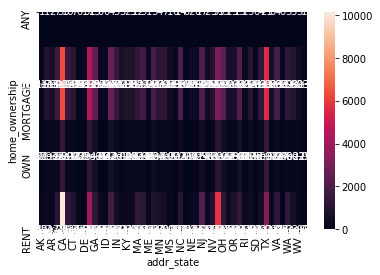

In [50]:
ownership_by_state = pd.crosstab(df_anon['home_ownership'], df_anon['addr_state'])
print(ownership_by_state)
# seems to break, too many states
sns.heatmap(ownership_by_state, annot=True);

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01